In [1]:
!pip install py4j

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from pyspark import SparkConf, SparkContext, SQLContext

In [4]:
# Configure spark context settings and initialize SQL context
conf = (SparkConf()
         .setAppName("s3a_test")
         .set("spark.executor.instances", "8")
         .set("spark.executor.cores", 2)
         .set("spark.shuffle.compress", "true")
         .set("spark.io.compression.codec", "snappy")
         .set("spark.executor.memory", "2g"))

sc = SparkContext(conf = conf)

sqlContext = SQLContext(sc)

In [8]:
# READ DATA FILE
df = sqlContext.read.load("training.parquet")

In [10]:
df.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [152]:
df.count()

4924990

## Unsupervised Analysis: PCA

In [170]:
from pyspark.ml.feature import StandardScaler, PCA
from pyspark.mllib.regression import LabeledPoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [155]:
# Sample data for PCA
sample = df.sample(False, 0.001, seed=None)

In [158]:
## Standardize Values
standardScaler = StandardScaler(inputCol='features', outputCol='featuresStd')
model = standardScaler.fit(sample)
standard_df = model.transform(df).drop('features')

In [159]:
## Run PCA
pca = PCA(k=2, inputCol="featuresStd", outputCol="pcaFeatures")
model = pca.fit(standard_df)

pcaSample = model.transform(standard_df).drop('featuresStd')

In [166]:
pca_pd = pcaSample.toPandas()

In [ ]:
def plotPoint(label, x):
    plt.scatter(x[0],x[1])
#     plt.annotate(label, (x[0],x[1]))

In [ ]:
pca_pd.apply(lambda x: plotPoint(x.label, x.pcaFeatures),1)
plt.show()

In [ ]:
# Plot Eigenvalues


In [164]:
# plot variance explained                                                                                            
covar_matrix = PCA(k=200, inputCol="featuresStd", outputCol="pcaFeatures")
model = covar_matrix.fit(standard_df)


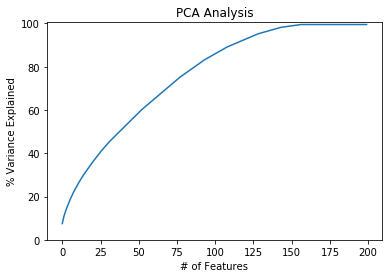

In [165]:
# Calculate and plot explained ratios
var=np.cumsum(np.round(model.explainedVariance, decimals=3)*100)
var #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)